In [1]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from pathlib import Path
from rosamllib.readers import DICOMImageReader, REGReader
from rosamllib.registration import ImageRegistration
from rosamllib.viewers import visualize_fusion, interactive_image_viewer
from rosamllib.readers import DICOMLoader
# %matplotlib widget
# %matplotlib inline

In [2]:
ct_path = r"C:\Users\yabdulkadir\Box\debugging_02_20_2025\CT.2.16.840.1.114362.1.6.6.5.16628.10016070767.481419547.381.5"
cbct_path = r"C:\Users\yabdulkadir\Box\debugging_02_20_2025\2018-04-23\CBCT.1.2.246.352.62.2.4865292173510488370.4940580856509997236"
reg_path = r"C:\Users\yabdulkadir\Box\debugging_02_20_2025\2018-04-23\REG.1.2.246.352.62.5.5528070767293797374.15043424007885100688.dcm"

In [3]:
path = Path(r"C:\Users\yabdulkadir\Desktop\open_source\Registration\test_files")
loader = DICOMLoader(path)
loader.load()

Scanning directories: 18it [00:00, 5009.12it/s]


Found 639 files.


Loading DICOM files: 100%|██████████| 639/639 [00:01<00:00, 393.04file/s]


In [4]:
loader.get_summary()

{'total_patients': 2,
 'total_studies': 4,
 'total_series': 11,
 'total_instances': 636}

In [5]:
pids = loader.get_patient_ids()

In [16]:
loader.get_modality_distribution()

{'PT': 1, 'CT': 2, 'RTDOSE': 4, 'RTSTRUCT': 3, 'MR': 1, 'REG': 1}

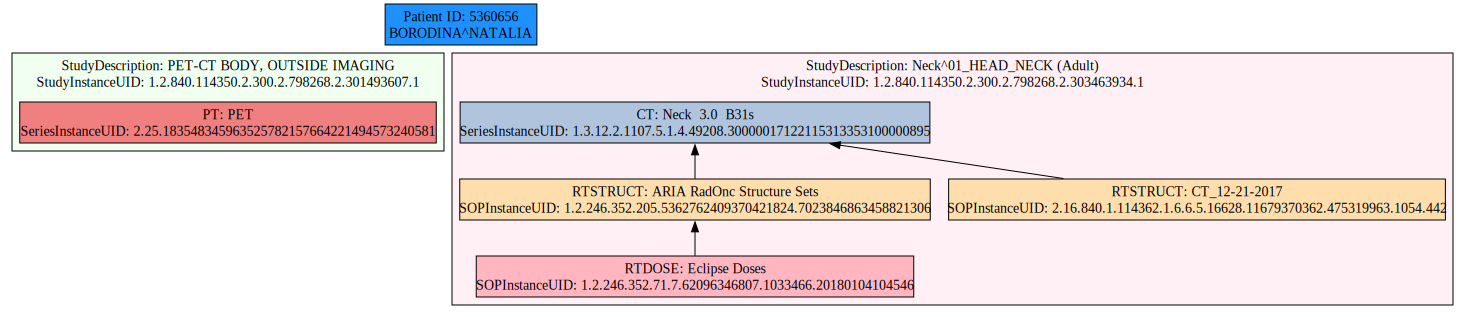

In [17]:
loader.visualize_series_references(patient_id=pids[0], include_uid=True)

In [7]:
ct2_image = loader.read_series("1.2.276.0.20.1.3.5.550353714951.34820.1597700821.355000")[0]
mr2_image = loader.read_series("1.3.12.2.1107.5.2.12.21264.30000020081014414360900016770")[0]
reg2 = loader.read_instance("2.16.840.1.114362.1.11775105.23599837070.555500807.249.156")

In [8]:
visualize_fusion(mr2_image, ct2_image, center_align=True, axis=0, cmap=plt.cm.Greys_r)

interactive(children=(IntSlider(value=87, description='slice_idx', max=175), FloatSlider(value=0.5, descriptio…

In [9]:
img_reg = ImageRegistration(reg2, ct2_image, mr2_image)
registered_mr = img_reg.apply_registration()

In [10]:
print(reg2.moving_image_info["transformation_matrix"])

[[ 9.98564124e-01 -4.99182567e-02 -1.94296781e-02 -4.25049973e+00]
 [ 4.98608164e-02  9.98750269e-01 -3.43069434e-03  2.01772156e+02]
 [ 1.95766650e-02  2.45705247e-03  9.99805212e-01 -5.21274231e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [11]:
print(np.linalg.inv(reg2.moving_image_info["transformation_matrix"]))

[[ 9.98564468e-01  4.98608092e-02  1.95766567e-02  4.38868170e+00]
 [-4.99182814e-02  9.98750298e-01  2.45698945e-03 -2.00451413e+02]
 [-1.94296949e-02 -3.43075852e-03  9.99805467e-01  5.21782472e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [12]:
interactive_image_viewer(mr2_image, cmap='grey', axis=0)

IntSlider(value=88, description='Slice', max=175)

In [13]:
interactive_image_viewer(ct2_image, axis=0, cmap="grey")

IntSlider(value=114, description='Slice', max=227)

In [14]:
interactive_image_viewer(registered_mr, axis=0, cmap="grey")

IntSlider(value=114, description='Slice', max=227)

In [15]:
visualize_fusion(ct2_image, registered_mr, center_align=True, axis=0, cmap=plt.cm.Greys_r)

interactive(children=(IntSlider(value=75, description='slice_idx', max=151), FloatSlider(value=0.5, descriptio…

In [18]:
print(f"{mr2_image.GetOrigin()=}, {mr2_image.GetDirection()=}")
print(f"{registered_ct.GetOrigin()=}, {registered_ct.GetDirection()=}")

mr2_image.GetOrigin()=(-137.28320483351, -179.58431781439, -38.217242431222), mr2_image.GetDirection()=(0.99866184141248, 0.01427517854292, 0.0497065969888, -1.22049035e-10, 0.96114869048003, -0.2760311482216, -0.05171582452827428, 0.27566177476411763, 0.9598625211077229)
registered_ct.GetOrigin()=(-137.28320483351, -179.58431781439, -38.217242431222), registered_ct.GetDirection()=(0.99866184141248, 0.01427517854292, 0.0497065969888, -1.22049035e-10, 0.96114869048003, -0.2760311482216, -0.05171582452827428, 0.27566177476411763, 0.9598625211077229)


In [23]:
ct_image = DICOMImageReader(ct_path).read()
cbct_image = DICOMImageReader(cbct_path).read()
reg = REGReader(reg_path).read()

In [24]:
ct_image.GetSize()

(512, 512, 135)

In [25]:
ct_img = ct_image.get_image_array()
mr_img = cbct_image.get_image_array()

In [26]:
print(ct_img.shape)
print(mr_img.shape)

(135, 512, 512)
(93, 512, 512)


In [27]:
visualize_fusion(ct_image, cbct_image, center_align=True, axis=2, cmap=plt.cm.Greys_r, origin="lower")

interactive(children=(IntSlider(value=255, description='slice_idx', max=511), FloatSlider(value=0.5, descripti…

In [28]:
# registered_img = register_images(ct_reader, mr_reader, reg_reader)
img_reg = ImageRegistration(reg, ct_image, cbct_image)
registered_image = img_reg.apply_registration()

In [29]:
visualize_fusion(ct_image, registered_image, center_align=True, axis=2, cmap=plt.cm.Greys_r, origin='lower')

interactive(children=(IntSlider(value=255, description='slice_idx', max=511), FloatSlider(value=0.5, descripti…

In [59]:
print(reg.moving_image_info["transformation_matrix"])

[[ 9.99999985e-01  0.00000000e+00 -1.71042266e-04  4.44742745e+01]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -2.37564834e+02]
 [ 1.71042266e-04  0.00000000e+00  9.99999985e-01  5.52317859e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [30]:
registered_image.GetSize()

(512, 512, 135)

In [31]:
interactive_image_viewer(img=registered_image, cmap="gray")

IntSlider(value=202, description='Slice', max=404)

In [16]:
print(reg.moving_image_info["transformation_matrix"])

[[ 9.99999985e-01  0.00000000e+00 -1.71042266e-04  4.44742745e+01]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -2.37564834e+02]
 [ 1.71042266e-04  0.00000000e+00  9.99999985e-01  5.52317859e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [18]:
from pydicom import dcmread

In [19]:
path = Path(r"C:\Users\yabdulkadir\Desktop\temp_reg\2020-08__Studies\DOE^JOHN_ANON30013_REG_2020-08-10_174754_MR.BRAIN.WO+W.CONTRAST_CHART.ROUNDS.Aug.2020_n1__00000\2.16.840.1.114362.1.12289667.25176973841.698218352.148.1.dcm")

In [20]:
reg_ds = dcmread(path)

In [52]:
reg_json = reg_ds.to_json_dict()

In [53]:
reg_json.keys()

dict_keys(['00080005', '00080012', '00080013', '00080016', '00080018', '00080020', '00080021', '00080023', '00080030', '00080031', '00080033', '00080050', '00080060', '00080070', '00080080', '00080090', '00081030', '0008103E', '00081090', '00081115', '00081200', '00100010', '00100020', '00100030', '00100040', '00101010', '00101020', '00101030', '00120062', '00120063', '00181020', '0020000D', '0020000E', '00200010', '00200011', '00200013', '00200052', '00201040', '00700080', '00700081', '00700084', '00700308'])

In [40]:
import json

In [48]:
type(reg_json)

dict

In [49]:
reg_json = json.dumps(reg_json)

In [50]:
reg_json

'{"00080005": {"vr": "CS", "Value": ["ISO_IR 100"]}, "00080012": {"vr": "DA", "Value": ["20200810"]}, "00080013": {"vr": "TM", "Value": ["184827"]}, "00080016": {"vr": "UI", "Value": ["1.2.840.10008.5.1.4.1.1.66.1"]}, "00080018": {"vr": "UI", "Value": ["2.16.840.1.114362.1.12289667.25176973841.698218352.148.1"]}, "00080020": {"vr": "DA", "Value": ["20200810"]}, "00080021": {"vr": "DA", "Value": ["20200810"]}, "00080023": {"vr": "DA", "Value": ["20200817"]}, "00080030": {"vr": "TM", "Value": ["174754.000000"]}, "00080031": {"vr": "TM", "Value": ["184827"]}, "00080033": {"vr": "TM", "Value": ["194126.249"]}, "00080050": {"vr": "SH"}, "00080060": {"vr": "CS", "Value": ["REG"]}, "00080070": {"vr": "LO", "Value": ["MIM Software Inc."]}, "00080080": {"vr": "LO"}, "00080090": {"vr": "PN"}, "00081030": {"vr": "LO", "Value": ["MR BRAIN WO+W CONTRAST"]}, "0008103E": {"vr": "LO", "Value": ["CHART ROUNDS Aug 2020"]}, "00081090": {"vr": "LO", "Value": ["MIM"]}, "00081115": {"vr": "SQ", "Value": [{"

In [54]:
with open("reg_json.json", "w") as js:
    json.dump(reg_json, js, indent=4)

In [55]:
with open("reg_ds.txt", 'w') as rds:
    print(reg_ds, file=rds)